# Comparing models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
dist1 = np.load('fixed1.npz')
dist2 = np.load('fixed2.npz')
scores1 = np.asarray([dist1['scores']]).flatten()
scores2 = np.asarray([dist2['scores']]).flatten()
scores1.sort()
scores2.sort()
results = np.vstack([scores1, scores2])
print(results.shape)
logresults = np.log10(results + 1)


(2, 1000)


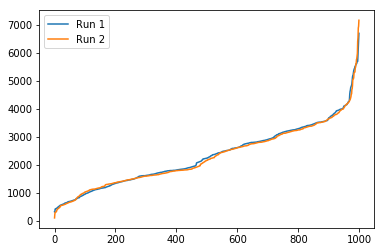

In [4]:
for i in range(2):
    plt.plot(results[i])
plt.legend(['Run 1','Run 2'])


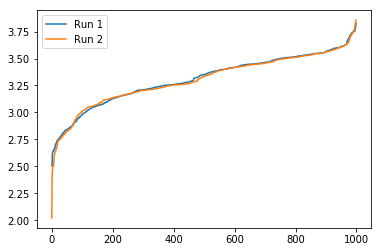

In [5]:
for i in range(2):
    plt.plot(logresults[i])
plt.legend(['Run 1','Run 2'])


In [7]:
# KS stats for sampling error for n=1000.
# Sampling from the same distribution gives
# a k-stat of 0.032 and p of 0.68
# 1000 samples should have enough stat power
# to resolve small differences in performance
stats.ks_2samp(logresults[0], logresults[1])


Ks_2sampResult(statistic=0.03199999999999997, pvalue=0.6785103823828913)

# Trained models
Evaluate trained models by comparing their performance 
